#Project Name
Hotel Booking Analysis

In [73]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Import Libraries

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Hotel Bookings.csv')

In [76]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [77]:
df.shape

(119390, 32)

In [78]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

###Clean the Data

In [80]:
#Check the missing values in the columns

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [81]:
#Column-wise null percentage
print(round(100*(df.isnull().sum()/len(df.index)),2))

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


In [82]:
df = df.drop(['agent','company'],axis=1)

In [83]:
#Drop unecessary Nan values
df = df.dropna(axis=0)


In [84]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [85]:
#Rename the columns for better readability

df.columns = ['Hotel', 'Canceled', 'LeadTime', 'ArrivingYear', 'ArrivingMonth', 'ArrivingWeek','ArrivingDate', 'WeekendStay',
              'WeekStay', 'Adults', 'Children', 'Babies', 'Meal','Country', 'Segment', 'DistChannel','RepeatGuest', 'PrevCancel',
              'PrevBook', 'BookRoomType','AssignRoomType', 'ChangeBooking', 'DepositType', 'WaitingDays',
              'CustomerType', 'ADR','ParkSpace', 'SpecialRequest','Reservation', 'ReservationDate']

##Identify Continous and Categorical Variables

In [86]:
def var(df):
  unique_list = pd.DataFrame([[i,len(df[i].unique())] for i in df.columns])
  unique_list.columns = ['name','uniques']
  total_var = set(df.columns)
  cat_var = set(unique_list.name[unique_list.uniques<=12])
  con_var = total_var - cat_var
  return cat_var , con_var

cat_var , con_var = var(df)
print('Categorical Variable ',len(cat_var),cat_var)
print('Continous Variable ',len(con_var),con_var)



Categorical Variable  17 {'RepeatGuest', 'ArrivingMonth', 'BookRoomType', 'Reservation', 'Babies', 'CustomerType', 'SpecialRequest', 'Children', 'Canceled', 'DistChannel', 'DepositType', 'ParkSpace', 'Segment', 'Meal', 'Hotel', 'ArrivingYear', 'AssignRoomType'}
Continous Variable  13 {'PrevBook', 'PrevCancel', 'WeekStay', 'ReservationDate', 'ADR', 'Country', 'Adults', 'LeadTime', 'WaitingDays', 'WeekendStay', 'ArrivingDate', 'ArrivingWeek', 'ChangeBooking'}


In [87]:
## Checking outliers
df[con_var].describe()

<ipython-input-87-92f0a78454e5>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[con_var].describe()


,PrevBook,PrevCancel,WeekStay,ADR,Adults,LeadTime,WaitingDays,WeekendStay,ArrivingDate,ArrivingWeek,ChangeBooking
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.131634,0.087142,2.502145,102.003243,1.858391,104.311435,2.330754,0.928897,15.800880,27.166555,0.221181
std,1.484672,0.845869,1.900168,50.485862,0.578576,106.903309,17.630452,0.996216,8.780324,13.589971,0.652785
min,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,70.000000,2.000000,18.000000,0.000000,0.000000,8.000000,16.000000,0.000000
50%,0.000000,0.000000,2.000000,95.000000,2.000000,69.000000,0.000000,1.000000,16.000000,28.000000,0.000000
75%,0.000000,0.000000,3.000000,126.000000,2.000000,161.000000,0.000000,2.000000,23.000000,38.000000,0.000000
max,72.000000,26.000000,41.000000,5400.000000,55.000000,737.000000,391.000000,16.000000,31.000000,53.000000,21.000000


List of Continuous Variables with Outliers identified through Summary Statistics are:
1. LeadTime
2. WaitingDays
3. WeekendStay
4. Adults
5. PrevBook
6. PrevCancel
7. WeekStay




In [88]:
df['PrevCancel'].unique()

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11])

Imputing the outliers (For Continous Variable)

In [89]:
df.loc[df.LeadTime > 500,'LeadTime'] = 500
df.loc[df.WaitingDays > 0 , 'WaitingDays']=1
df.loc[df.WeekendStay >= 5 , 'WeekendStay']=5
df.loc[df.Adults >= 4 , 'Adults']=4
df.loc[df.PrevBook >= 0 , 'PrevBook']=1
df.loc[df.PrevCancel >= 0 , 'PrevCancel']=1
df.loc[df.WeekStay > 10 , 'WeekStay'] =10
df.loc[df.ChangeBooking > 5,'ChangeBooking']=5

In [90]:
df[con_var].describe()

<ipython-input-90-b4e65b81c528>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[con_var].describe()


,PrevBook,PrevCancel,WeekStay,ADR,Adults,LeadTime,WaitingDays,WeekendStay,ArrivingDate,ArrivingWeek,ChangeBooking
count,118898.0,118898.0,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,1.0,1.0,2.481581,102.003243,1.855607,104.054543,0.031102,0.924187,15.800880,27.166555,0.217237
std,0.0,0.0,1.760766,50.485862,0.488194,105.834923,0.173595,0.967762,8.780324,13.589971,0.602693
min,1.0,1.0,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1.0,1.0,1.000000,70.000000,2.000000,18.000000,0.000000,0.000000,8.000000,16.000000,0.000000
50%,1.0,1.0,2.000000,95.000000,2.000000,69.000000,0.000000,1.000000,16.000000,28.000000,0.000000
75%,1.0,1.0,3.000000,126.000000,2.000000,161.000000,0.000000,2.000000,23.000000,38.000000,0.000000
max,1.0,1.0,10.000000,5400.000000,4.000000,500.000000,1.000000,5.000000,31.000000,53.000000,5.000000


In [91]:
df[cat_var].info()

<ipython-input-91-6d5ae8bd384c>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[cat_var].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   RepeatGuest     118898 non-null  int64  
 1   ArrivingMonth   118898 non-null  object 
 2   BookRoomType    118898 non-null  object 
 3   Reservation     118898 non-null  object 
 4   Babies          118898 non-null  int64  
 5   CustomerType    118898 non-null  object 
 6   SpecialRequest  118898 non-null  int64  
 7   Children        118898 non-null  float64
 8   Canceled        118898 non-null  int64  
 9   DistChannel     118898 non-null  object 
 10  DepositType     118898 non-null  object 
 11  ParkSpace       118898 non-null  int64  
 12  Segment         118898 non-null  object 
 13  Meal            118898 non-null  object 
 14  Hotel           118898 non-null  object 
 15  ArrivingYear    118898 non-null  int64  
 16  AssignRoomType  118898 non-null  object 
dtypes: float64

In [92]:
# Outliers in Categorical Variable

df[cat_var].describe()

<ipython-input-92-8492e43fb83c>:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[cat_var].describe()


,RepeatGuest,Babies,SpecialRequest,Children,Canceled,ParkSpace,ArrivingYear
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.032011,0.007948,0.571683,0.104207,0.371352,0.061885,2016.157656
std,0.176029,0.097380,0.792678,0.399172,0.483168,0.244172,0.707459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2017.000000
max,1.000000,10.000000,5.000000,10.000000,1.000000,8.000000,2017.000000


In [93]:
print(df.Babies.unique())
print(df.Children.unique())
print(df.ParkSpace.unique())


[ 0  1  2 10  9]
[ 0.  1.  2. 10.  3.]
[0 1 2 8 3]


In [94]:
df.loc[df.Babies>8 , 'Babies']=0
df.loc[df.Children>8 , 'Children']=0
df.loc[df.ParkSpace>5 , 'ParkSpace']=0


In [95]:
df[cat_var].describe()

<ipython-input-95-1cbdc6f5e66b>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[cat_var].describe()


,RepeatGuest,Babies,SpecialRequest,Children,Canceled,ParkSpace,ArrivingYear
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.032011,0.007788,0.571683,0.104123,0.371352,0.061750,2016.157656
std,0.176029,0.089236,0.792678,0.398139,0.483168,0.241992,0.707459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2017.000000
max,1.000000,2.000000,5.000000,3.000000,1.000000,3.000000,2017.000000


# Data Preparation

In [96]:
# Lets Combine Children Babies Together as kids

df['Kids'] = df.Children + df.Babies
df['totalMembers'] = df.Kids + df.Adults

In [97]:
#Convert and Combine Date Columns
df['ArrivingYear'] = df['ArrivingYear'].astype('str')
df['ArrivingMonth'] = df['ArrivingMonth'].astype('str')
df['ArrivingDate'] = df['ArrivingDate'].astype('str')

In [98]:
# Lets convert arrival date to datetime
df['Arrival Date'] = df['ArrivingDate'] + '-' + df['ArrivingMonth'] + '-' + df['ArrivingYear']
df['Arrival Date'] = pd.to_datetime(df['Arrival Date'], errors='coerce')

In [99]:
confirmed_bookings = df[df.Canceled == 0]

In [100]:
import datetime as dt
confirmed_bookings['ArrivingMonth'] = df['Arrival Date'].dt.month
final = confirmed_bookings['ArrivingMonth'].value_counts().sort_index()
final

<ipython-input-100-632fca026ce0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirmed_bookings['ArrivingMonth'] = df['Arrival Date'].dt.month


1     4068
2     5317
3     6591
4     6533
5     7102
6     6393
7     7892
8     8618
9     6367
10    6867
11    4632
12    4365
Name: ArrivingMonth, dtype: int64

# EDA

#### Cancellations -
1. 0 - No Cancellation
2. 1 - Cancelled

In [103]:
print('Cancelled Bookings')
print('-'*50)
print(df.Canceled.value_counts())
print('-'*50)
print('Cancelled Percentage in both Hotels')
print((df['Canceled']==1).value_counts(normalize=True))


Cancelled Bookings
--------------------------------------------------
0    74745
1    44153
Name: Canceled, dtype: int64
--------------------------------------------------
Cancelled Percentage in both Hotels
False    0.628648
True     0.371352
Name: Canceled, dtype: float64


4153 bookings were canceled which is around 37%
### Country

In [106]:
df.Country.value_counts(normalize=True)

PRT    0.408636
GBR    0.102012
FRA    0.087596
ESP    0.072062
DEU    0.061288
         ...   
DJI    0.000008
BWA    0.000008
HND    0.000008
VGB    0.000008
NAM    0.000008
Name: Country, Length: 177, dtype: float64

Around 40% of all bookings were booked from Portugal followed by Great Britain(10%) & France(8%).

###Month

In [112]:
df.ArrivingMonth.value_counts(normalize=True)

August       0.116503
July         0.106209
May          0.099068
October      0.093315
April        0.092895
June         0.091902
September    0.088033
March        0.081911
February     0.067385
November     0.056788
December     0.056586
January      0.049404
Name: ArrivingMonth, dtype: float64

August is the most occupied (busiest) month with 11.62% bookings and January is the most unoccupied month with 4.96% bookings.

###Market Segment

In [115]:
df['Segment'].value_counts(normalize=True)

Online TA        0.474373
Offline TA/TO    0.203199
Groups           0.166580
Direct           0.104695
Corporate        0.042986
Complementary    0.006173
Aviation         0.001993
Name: Segment, dtype: float64

Around 47% of bookings are made via Online Travel Agents, almost 20% of bookings are made via Offline Travel Agents and less than 20% are Direct bookings without any other agents.

###Year

In [116]:
df.ArrivingYear.value_counts(normalize=True)

2016    0.474651
2017    0.341503
2015    0.183847
Name: ArrivingYear, dtype: float64

47% bookings were done in 2016, 34% in 2017 and 18 percent in 2015.. We can see increasing tendency in bookings year wise.

###Meal

In [119]:
df.Meal.value_counts(normalize=True)

BB           0.772620
HB           0.121398
SC           0.089472
Undefined    0.009798
FB           0.006712
Name: Meal, dtype: float64

Out of the meals, BB (Bed & Breakfast) is the most ordered meal which is around 77.2%, followed by HB(Half Board), SC(no meal package), Undefined and FB (Full Board).


###Customer Type

In [120]:
df.CustomerType.value_counts(normalize=True)

Transient          0.750004
Transient-Party    0.210920
Contract           0.034281
Group              0.004794
Name: CustomerType, dtype: float64

Transient type of customers are the more around 75%

###Reservation

In [121]:
df.Reservation.value_counts(normalize=True)

Check-Out    0.628648
Canceled     0.361234
No-Show      0.010118
Name: Reservation, dtype: float64

We can see 63% visitors checked out and 36% bookings were canceled.

#Data Visualization

Text(0.5, 1.0, 'Arriving year, Leadtime and Cancelations')

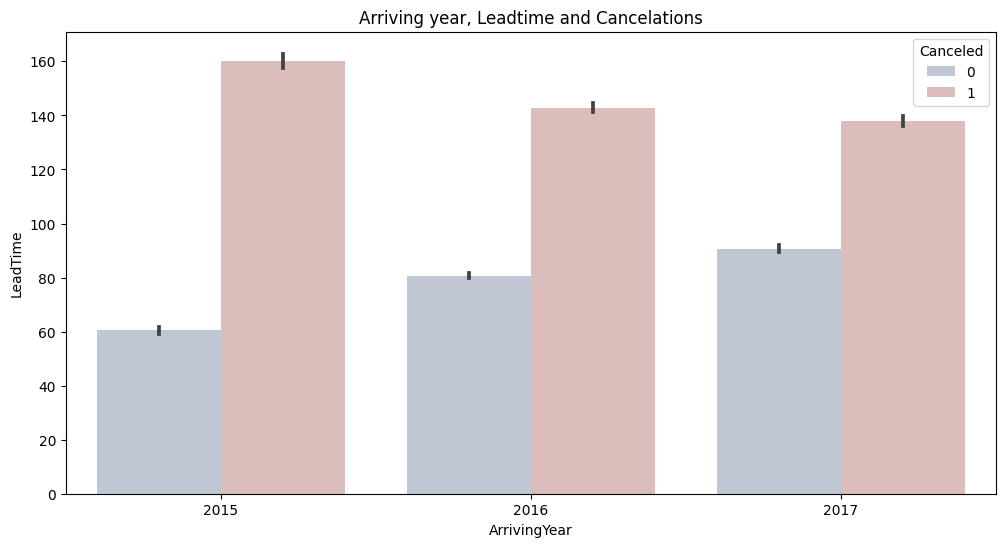

In [125]:
plt.figure(figsize=(12,6))
sns.barplot(x='ArrivingYear',y='LeadTime',hue='Canceled',data=df,palette='vlag')
plt.title('Arriving year, Leadtime and Cancelations')

For all the 3 years, bookings with a lead time less than 100 days have fewer chances of getting canceled, and lead time more than 100 days have more chances of getting canceled.

<ipython-input-126-230980a0f33d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='crest')


<Axes: >

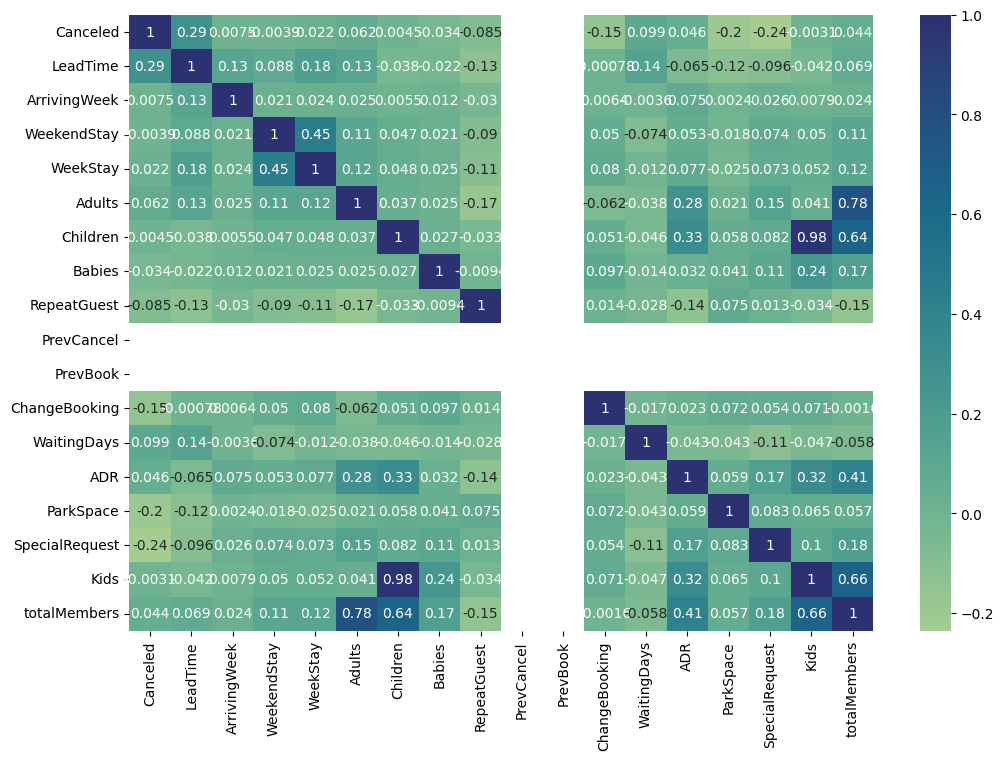

In [126]:
#Lets see the correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='crest')

In [130]:
df['Canceled'].value_counts()

0    74745
1    44153
Name: Canceled, dtype: int64

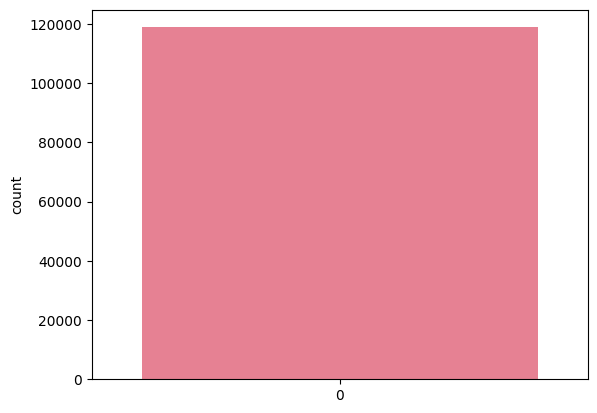

In [134]:
# Canceled = 1 , Not Canceled = 0

canceled_data = df['Canceled']
sns.countplot(canceled_data,palette='husl')
plt.show()

Majority of bookings were not canceled, still some half of the bookings were canceled.

<Axes: ylabel='Canceled'>

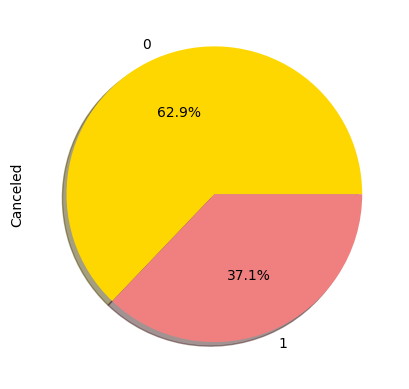

In [137]:
cols=['gold','lightcoral']
df['Canceled'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,colors=cols)

According to the pie chart, 63% of bookings were not canceled and 37% of the bookings were canceled at the Hotel.

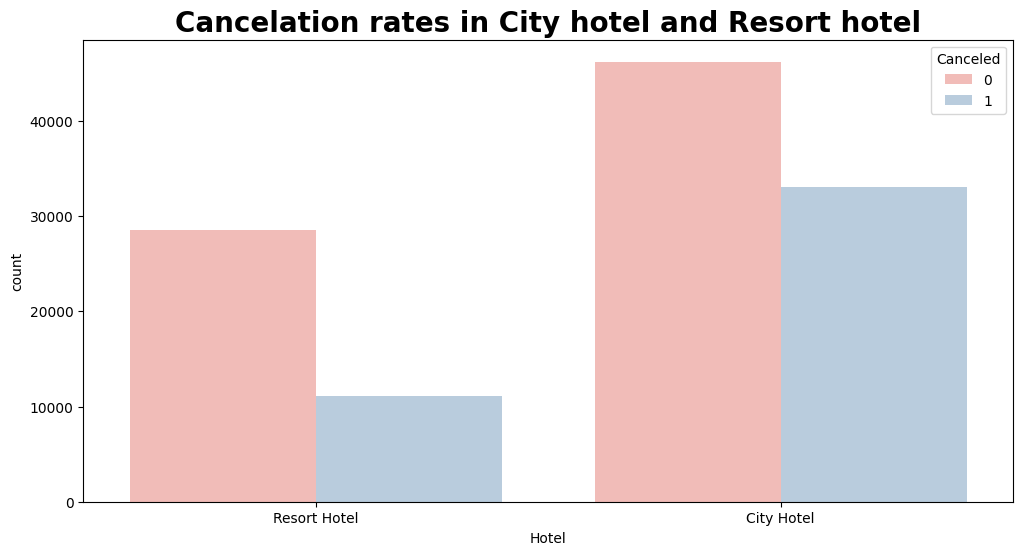

In [138]:
plt.figure(figsize=(12,6))
sns.countplot(x='Hotel',hue='Canceled',data=df,palette='Pastel1')
plt.title("Cancelation rates in City hotel and Resort hotel",fontweight="bold", size=20)
plt.show()

1. Most of the bookings are in City
hotel.
2. Cancellattion in Resort Hotel is less compared to city hotel.

Arrivals in Month/Year

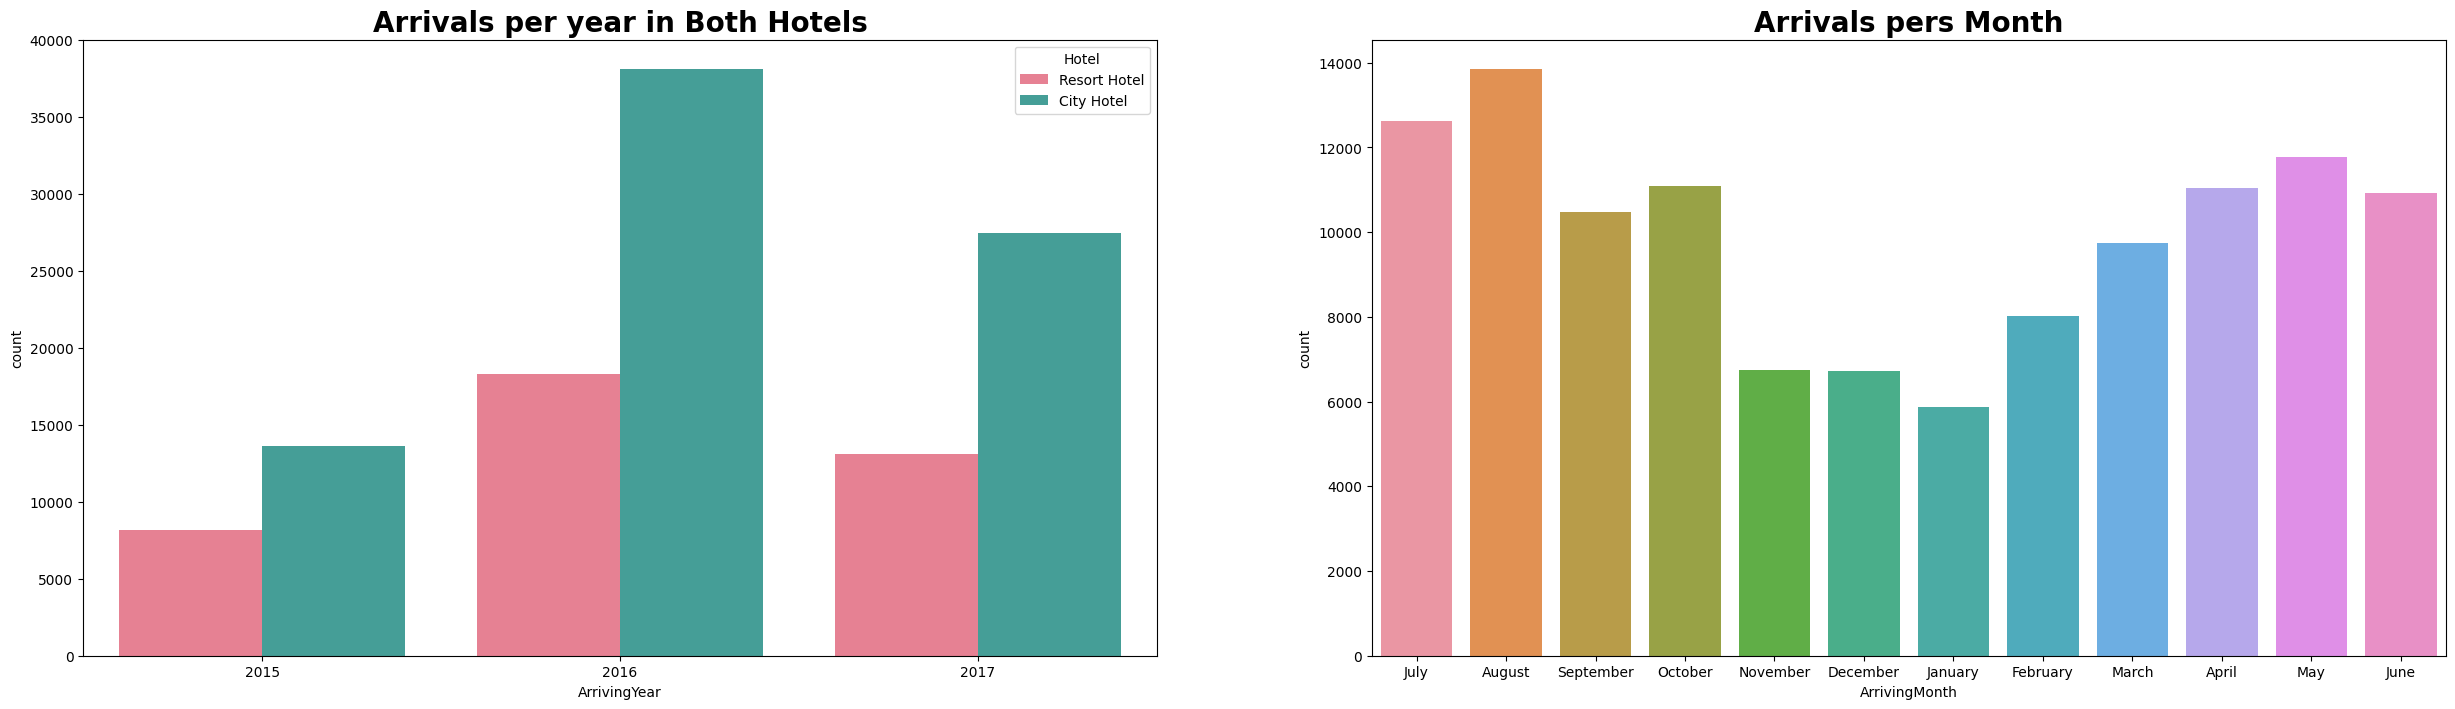

In [140]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(x='ArrivingYear',hue='Hotel',data=df,palette='husl')
plt.title('Arrivals per year in Both Hotels',fontweight='bold',size=20)
plt.subplot(1,2,2)
sns.countplot(data=df,x='ArrivingMonth')
plt.title('Arrivals pers Month',fontweight='bold',size=20)
plt.subplots_adjust(right=1.7)
plt.show()

1.  We can see most of the bookings were in the year 2016 and bookings were doine in City hotel.
2. Most bookings were done in the month of May,June, July, August.

###Week and Weekend Stays

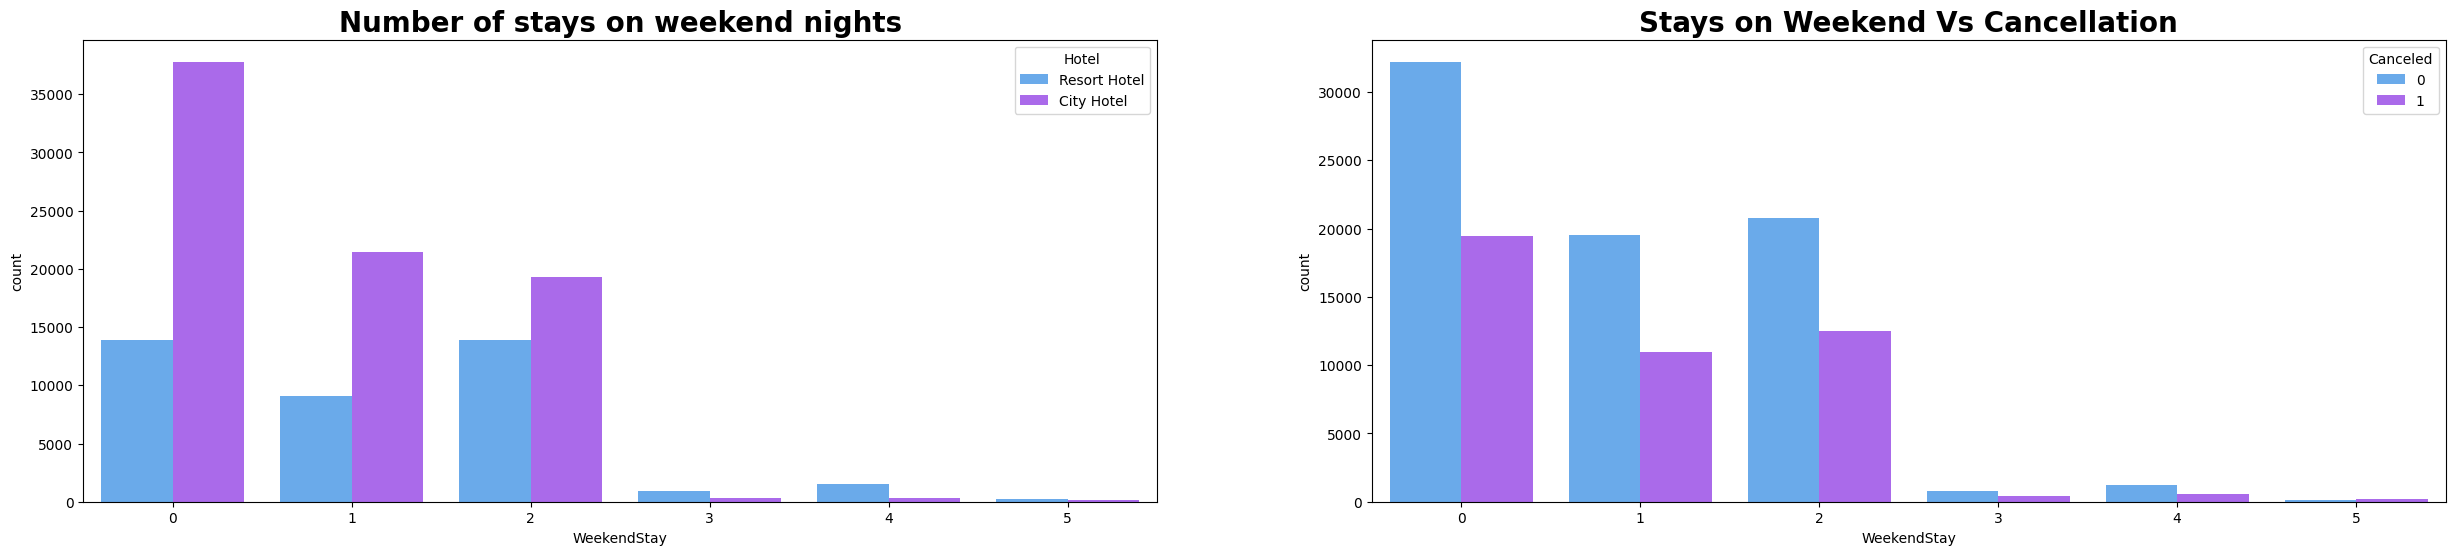

In [144]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(x='WeekendStay',hue='Hotel',data=df,palette='cool')
plt.title("Number of stays on weekend nights",fontweight="bold", size=20)

plt.subplot(1,2,2)
sns.countplot(x='WeekendStay',hue='Canceled',data=df,palette='cool')
plt.title("Stays on Weekend Vs Cancellation",fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()

1. In the first graph we can see that most of the weekend nights were booked in City Hotel.
2. Second plot shows most of weekend nights which were booked were not canceled.

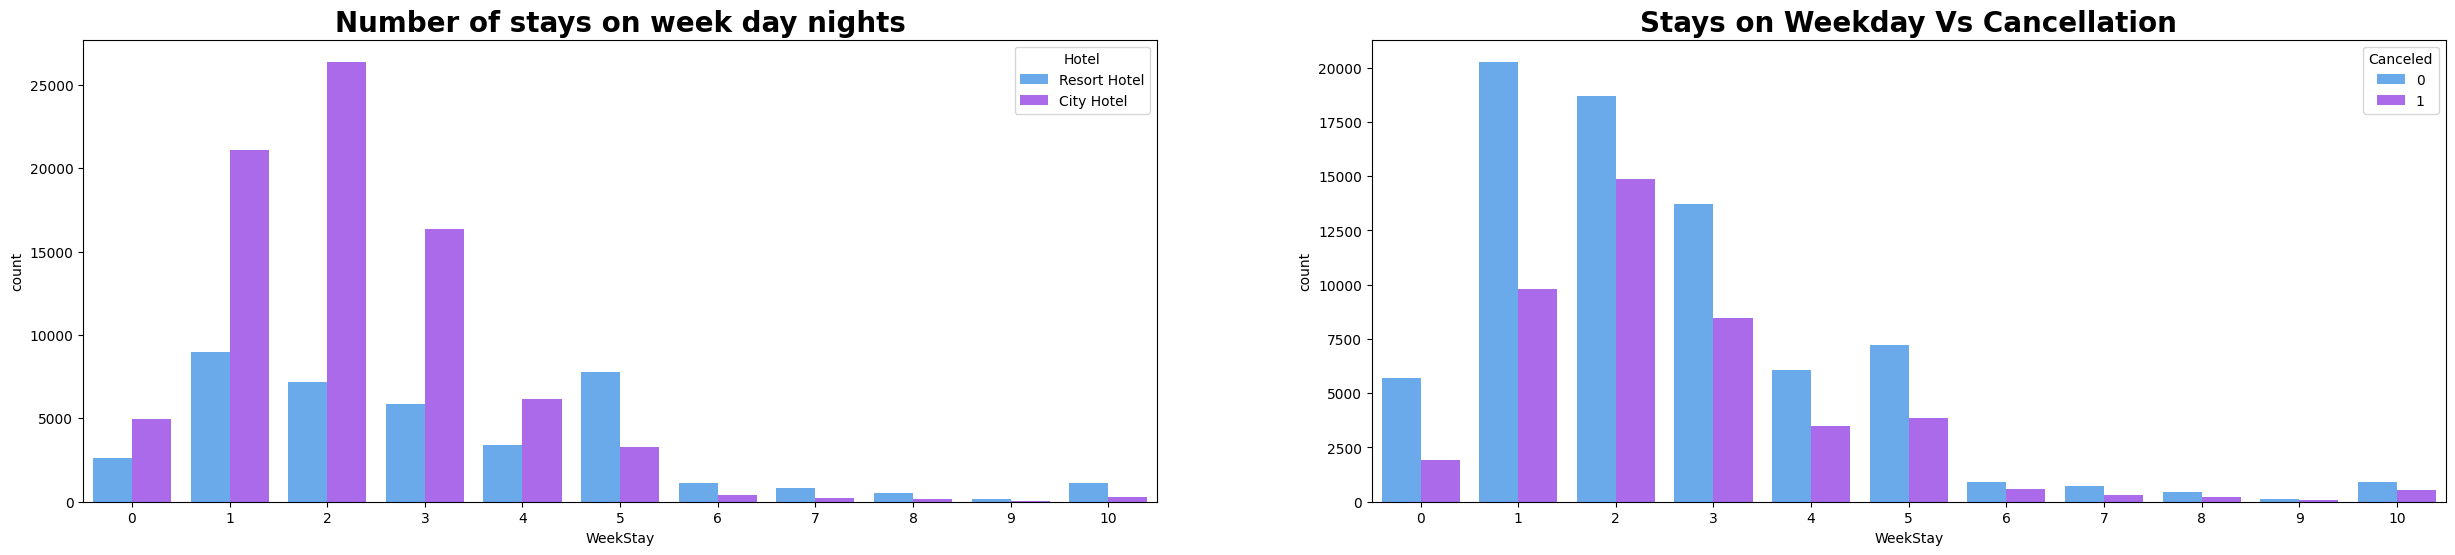

In [146]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(x='WeekStay',hue='Hotel',data=df,palette='cool')
plt.title("Number of stays on week day nights",fontweight="bold", size=20)

plt.subplot(1,2,2)
sns.countplot(x='WeekStay',hue='Canceled',data=df,palette='cool')
plt.title("Stays on Weekday Vs Cancellation",fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()

1. Weekday night stays were more in City Hotel
2. Less cancelations were observed

###Adults

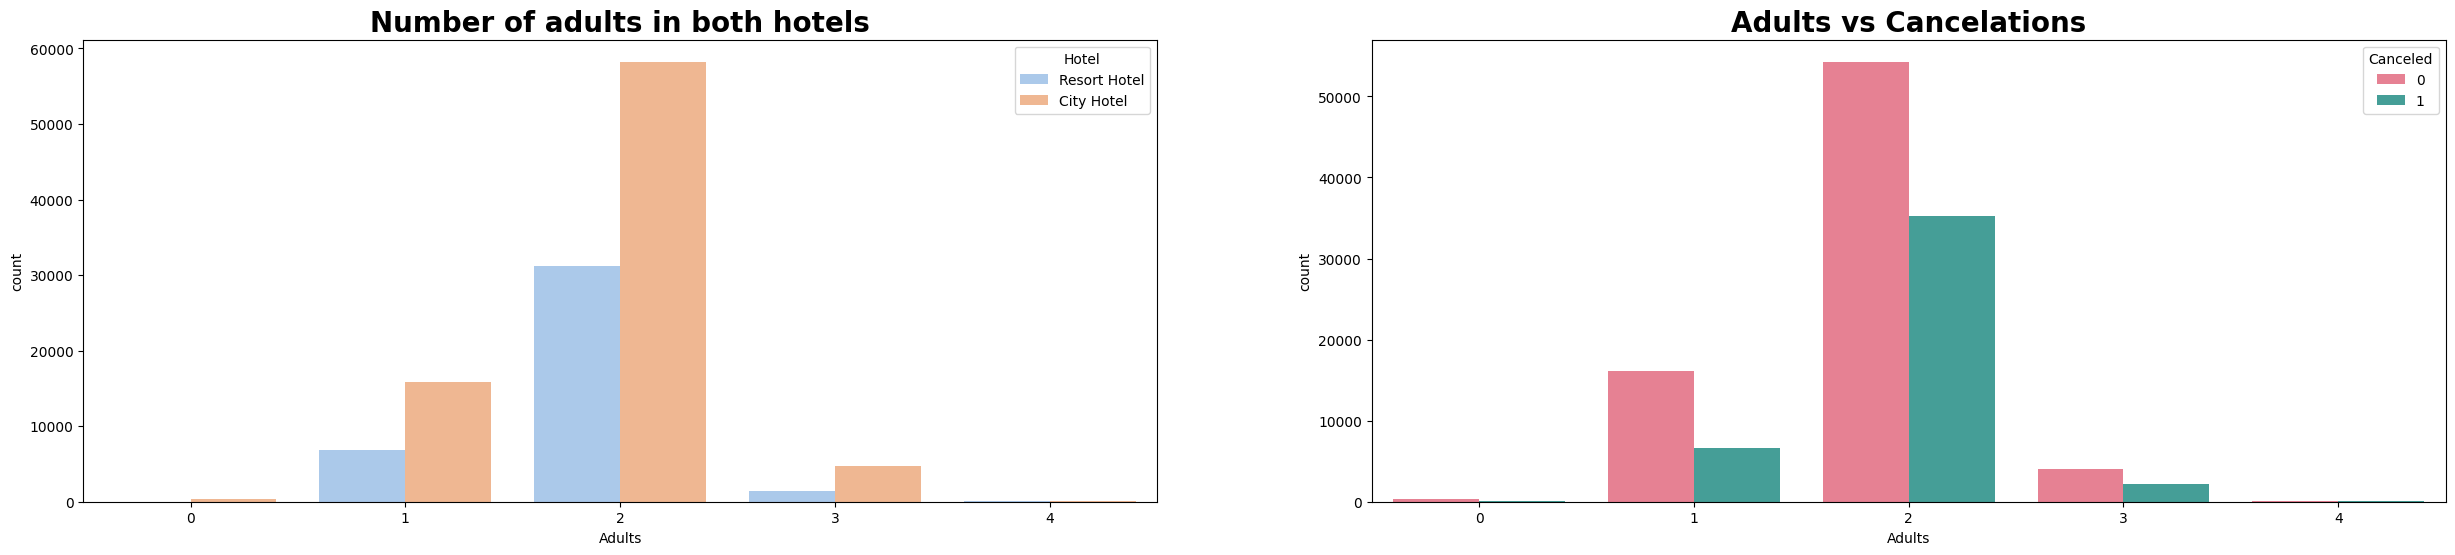

In [149]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Adults',hue='Hotel', data=df, palette='pastel')
plt.title("Number of adults in both hotels",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'Adults', hue='Canceled', palette='husl')
plt.title('Adults vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

Adults who were 2 in number are more and preferred city hotel rather than resort hotel, infact more than half the visitors even canceled the bookings.

###Children

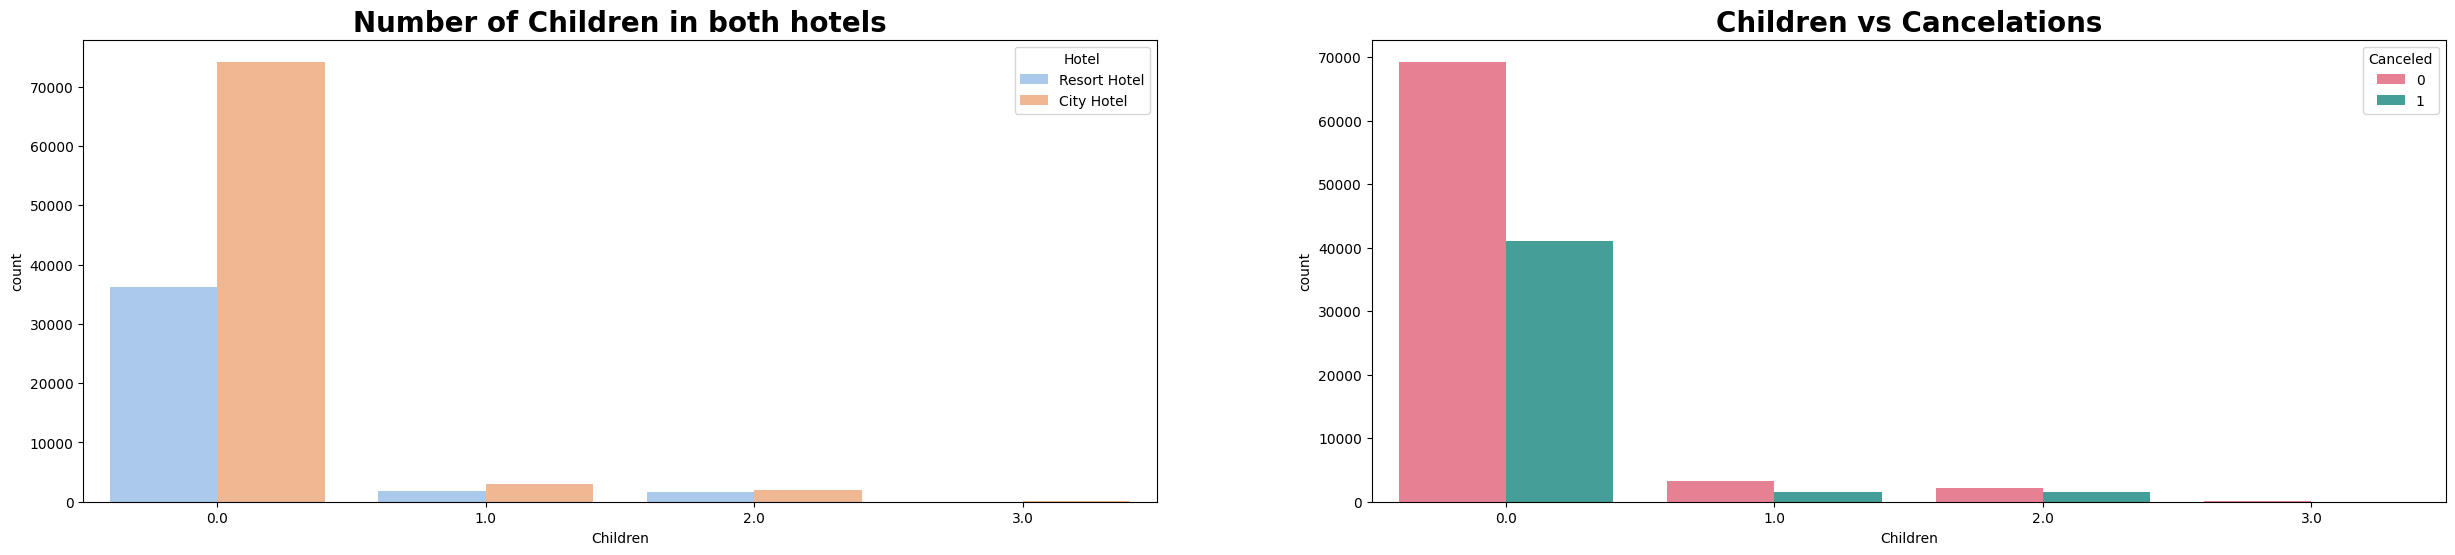

In [150]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Children',hue='Hotel', data=df, palette='pastel')
plt.title("Number of Children in both hotels",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'Children', hue='Canceled', palette='husl')
plt.title('Children vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

###Babies

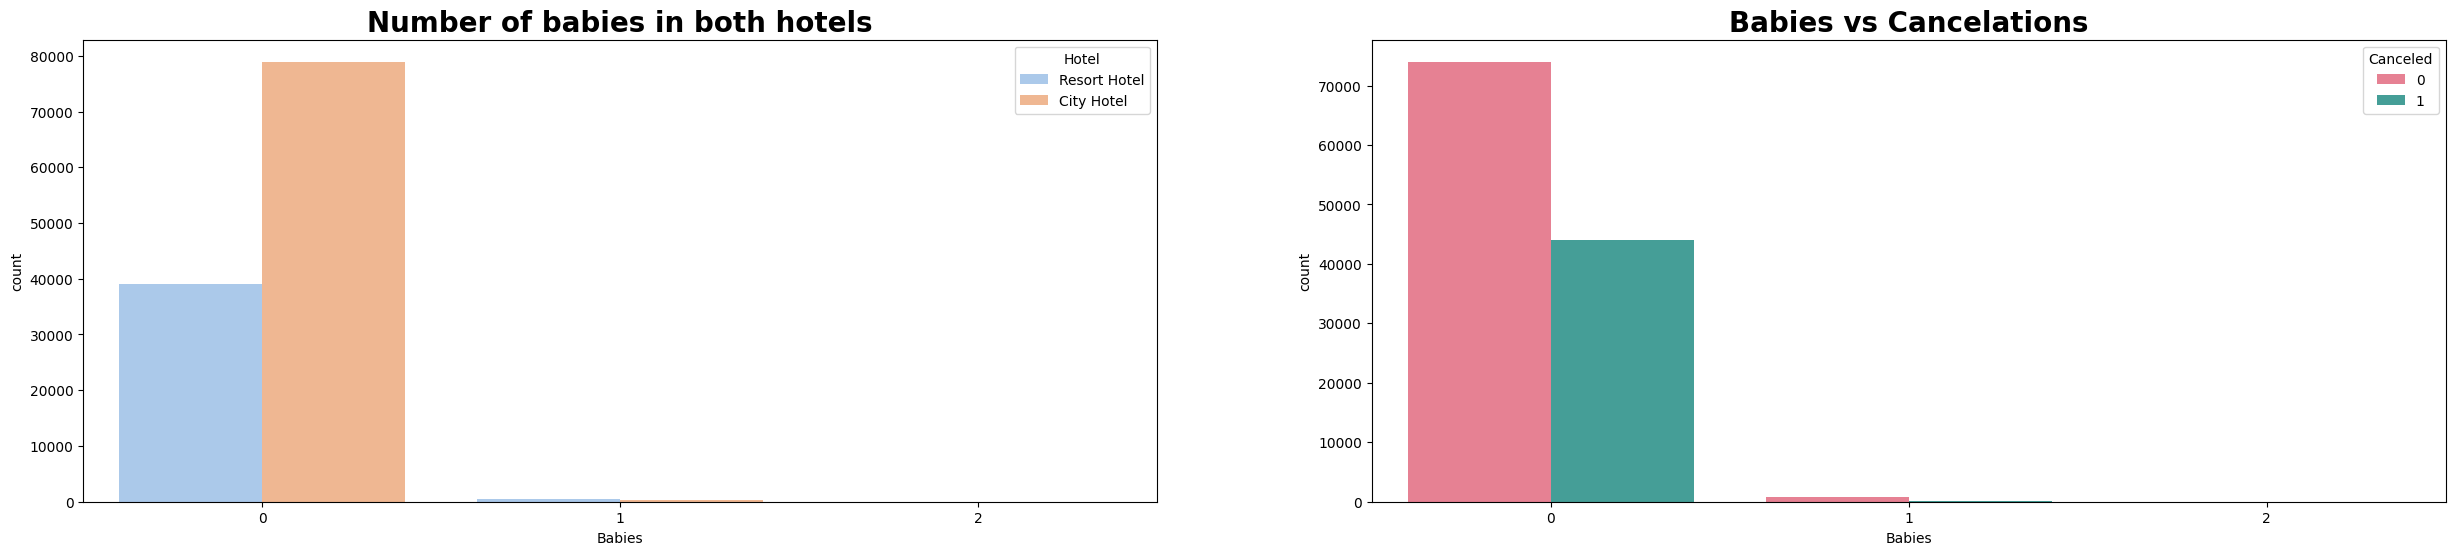

In [151]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Babies',hue='Hotel', data=df, palette='pastel')
plt.title("Number of babies in both hotels",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'Babies', hue='Canceled', palette='husl')
plt.title('Babies vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

###Countries

In [152]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
# Minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [153]:
country_visitors = df[df['Canceled']==0].groupby(['Country']).size().reset_index(name=)

In [163]:
country_visitors

,Country,Count
0,ABW,2
1,AGO,157
2,AIA,1
3,ALB,10
4,AND,2
...,...,...
160,VEN,14
161,VNM,6
162,ZAF,49
163,ZMB,1


In [168]:
px.choropleth(country_visitors , locations = 'Country',color='Count',hover_name='Country',color_continuous_scale='Viridis',title='Home Country of Visitors')

More visitors are from western europe, namely France, UK and Portugal being the highest.

###Market Segment

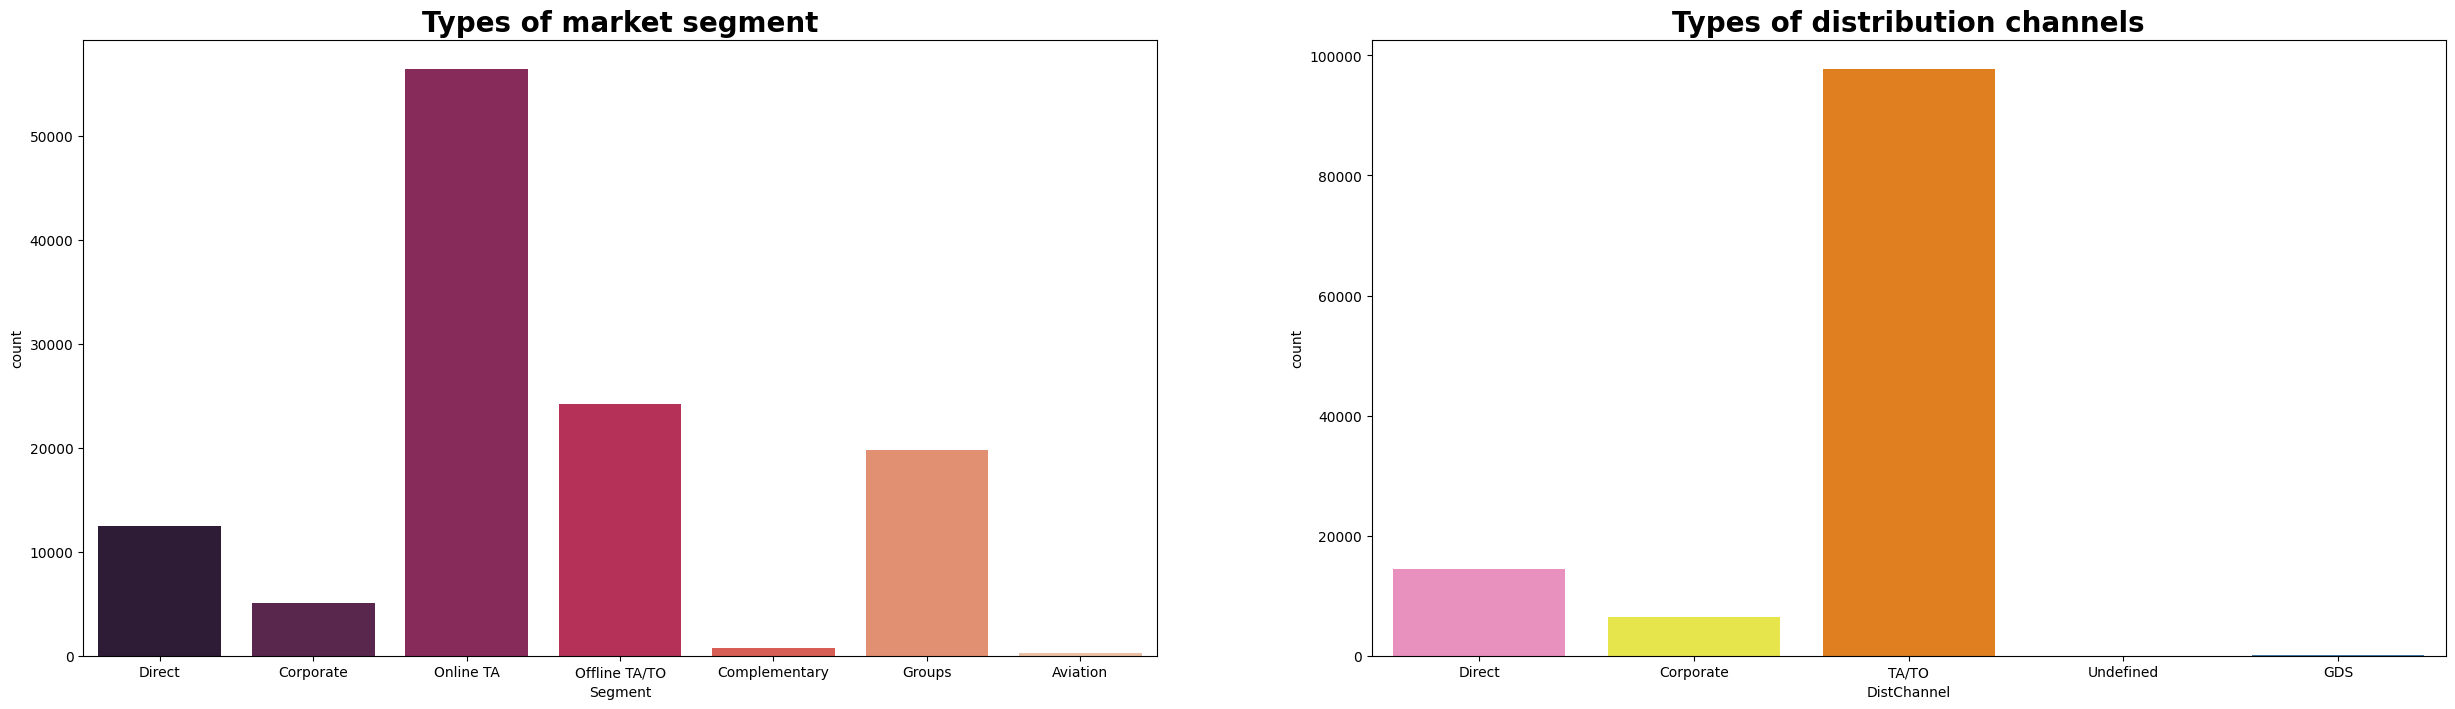

In [169]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='Segment', data=df, palette='rocket')
plt.title('Types of market segment',fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'DistChannel',  palette='Set1_r')
plt.title('Types of distribution channels',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()

 Majority DIstribution channels and Market segment were Travel agencies wither offline/online.

###Repeated Guest

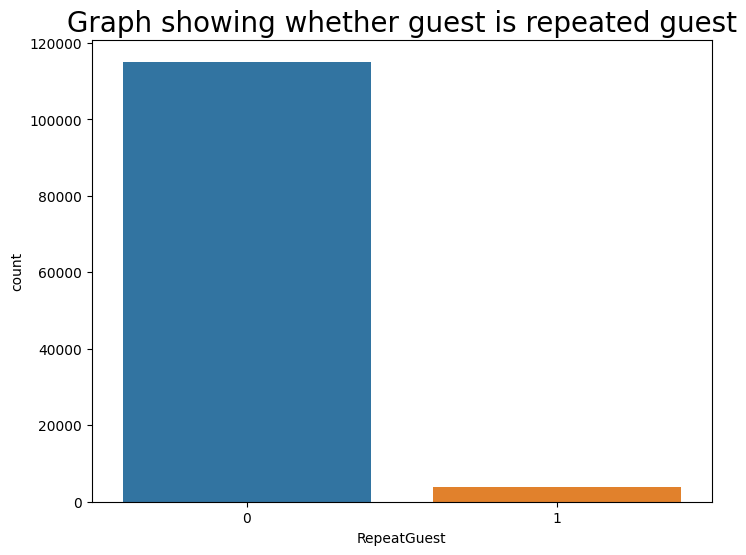

In [170]:
plt.figure(figsize=(8,6))
sns.countplot(data = df, x = 'RepeatGuest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)
plt.show()

1. A Low number of Repeated Guest.
2. Need to target repeated guest since they have booked before.

#Prices per month at Hotel
1. Average Daily Rate = Sum Of All Lodging Transaction / Total Number of Staying Night

2. Average Daily Rate Per Person = ADR / Adults+Children

3. We will need to find out average daily rate per person

In [174]:
df['ADR'].describe()

count    118898.000000
mean        102.003243
std          50.485862
min          -6.380000
25%          70.000000
50%          95.000000
75%         126.000000
max        5400.000000
Name: ADR, dtype: float64

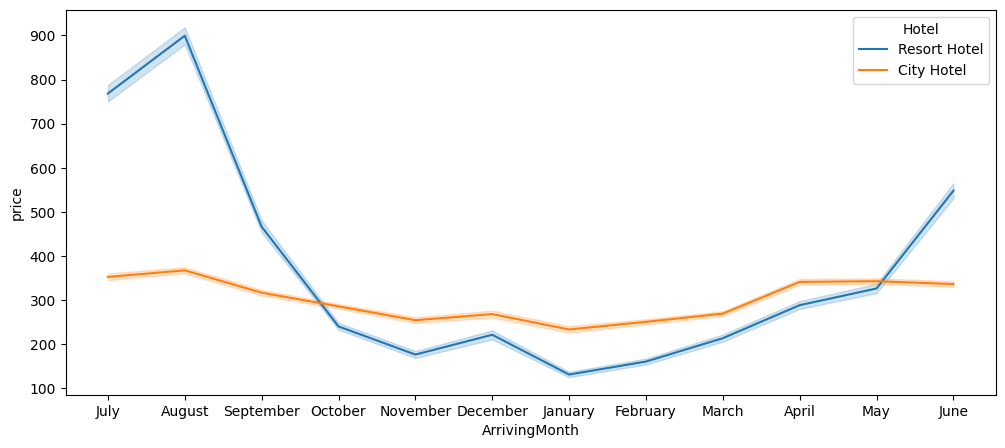

In [177]:
#Resizing Plot

plt.figure(figsize=(12,5))

#Calculate Average Daily Rate per person

df['adr_pp'] = df['ADR'] / (df['Adults'] + df['Children'])
actual_guests = df.loc[df["Canceled"] == 0]
actual_guests['price'] = actual_guests['ADR'] * (actual_guests['WeekendStay'] + actual_guests['WeekStay'])
sns.lineplot(data = actual_guests, x = 'ArrivingMonth', y = 'price', hue = 'Hotel')
plt.show()

1. Prices of resort hotel are much higher.
2. Prices of city hotel do not fluctuate that much.

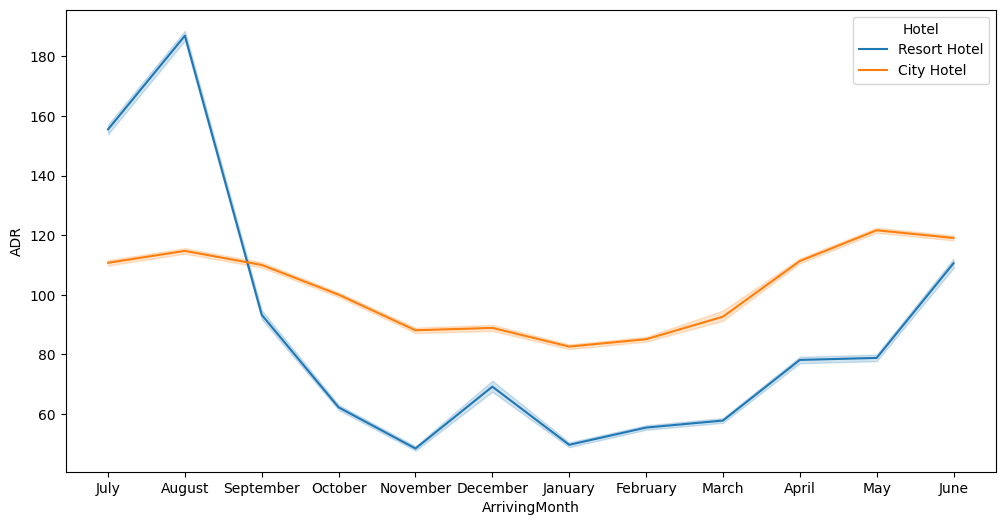

In [178]:
plt.figure(figsize=(12,6))
sns.lineplot(x='ArrivingMonth', y='ADR', hue='Hotel', data= df)
plt.show()

For Resort Hotel, ADR is more expensive during July, August & September and for City Hotel, ADR is slightly more during March, April & May.

#Summary -


1. Majority of the hotels booked are city hotel. Definitely need to spend the most targeting fund on those hotel.
2. We also realise that the high rate of cancellations can be due high no deposit policies.
3. We should also target months between May to Aug. Those are peak months due to the summer period.
4. Majority of the guests are from Western Europe. We should spend a significant amount of our budget on those area.
5. Given that we do not have repeated guests, we should target our advertisement on guests to increase returning guests.

# Strategies to Counter High Cancellations at the Hotel

1. Set Non-refundable Rates, Collect deposits, and implement more rigid cancellation policies.
2. Encourage Direct bookings by offering special discounts
3. Monitor where the cancellations are coming from such as Market Segment, distribution channels, etc.